In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Datos experimentales
x_list=[1.3,1.6,1.9]
y_list=[0.6200860,0.4554022,0.2818186]
dydx_list=[-0.5220232,-0.5698959,-0.5811571]


In [166]:
def DiferenciaDividida(x_list,y_list):
    n=len(x_list)
    # Creando lista z
    z=np.zeros(2*n)
    
    #Llenando lista Z
    for i in range(0,n):
        z[2*i]=x_list[i]
        z[2*i+1]=z[2*i]
    
    #Creando matriz de ceros
    a=np.zeros((2*n,2*n))
    
    #Llenando elementos de la diagonal
    for i in range(0,2*n):
        for j in range(0,2*n):
            if i==j:
                a[i][j] = y_list[int(i/2)]

    for k in range(1,2*n):
        for i in range(0,2*n-1): # Limite superior evita la diagnoal
            for j in range(1,2*n): # Limite inferior evita la diagnoal
                if j!=i and j==i+k and z[j]!=z[i]:
                    a[i][j]=(a[i+1][j]-a[i][j-1])/(z[j]-z[i])
                elif j!=i and j==i+k and z[j]==z[i]:
                    a[i][j]=dydx_list[int(i/2)]

    return a

In [167]:
#np.set_printoptions(precision=3)
print(DiferenciaDividida(x_list,y_list))

[[ 0.62  -0.522 -0.09   0.066  0.003 -0.003]
 [ 0.     0.62  -0.549 -0.07   0.068  0.001]
 [ 0.     0.     0.455 -0.57  -0.029  0.069]
 [ 0.     0.     0.     0.455 -0.579 -0.008]
 [ 0.     0.     0.     0.     0.282 -0.581]
 [ 0.     0.     0.     0.     0.     0.282]]


In [68]:
def PolyNewton(x_list,y_list,x):
    n=len(x_list) # Número de datos experimentales
    sum=0
    for i in range(1,n):
        prod=1
        for j in range(0,i):
            prod=prod*(x-x_list[j])
        sum=sum+prod*a[0][i]
    P=a[0][0]+sum
    return P

In [69]:
x_interpolado=np.linspace(min(x_list),max(x_list),5000)
y_interpolado=PolyNewton(x_list,y_list,x_interpolado)

NameError: name 'a' is not defined

NameError: name 'y_interpolado' is not defined

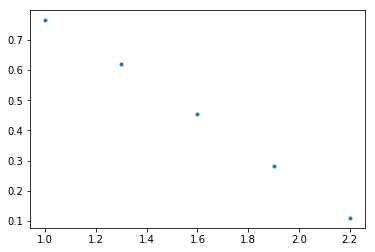

In [6]:
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'.')
ax.plot(x_interpolado,y_interpolado,'-')
plt.show()